# Supervised Learning (COMP0078) – Coursework 1

## 1.1 Linear Regression

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from collections import Counter

In [63]:
# import dataset given
data = np.array([(1, 3), (2, 2), (3, 0), (4, 5)])
# split x and y
X = data[:,0].reshape(-1,1)
y = data[:,1]

In [64]:
def find_Phi(X, degree):
    """ Compute polynomial features up to given degree """
    return np.hstack([X**d for d in range(degree)])

def linear_regression(X, y, method='pseudo'):
    """Estimate linear regression coefficients using different formulation"""
    
    if method == 'primal': 
        #return np.linalg.inv(X.T @ X) @ (X.T @ y) 
        return np.linalg.solve(X.T @ X, X.T @ y)
    
    elif method == 'pseudo':  
        return np.linalg.pinv(X.T @ X) @ (X.T @ y)

## (a)

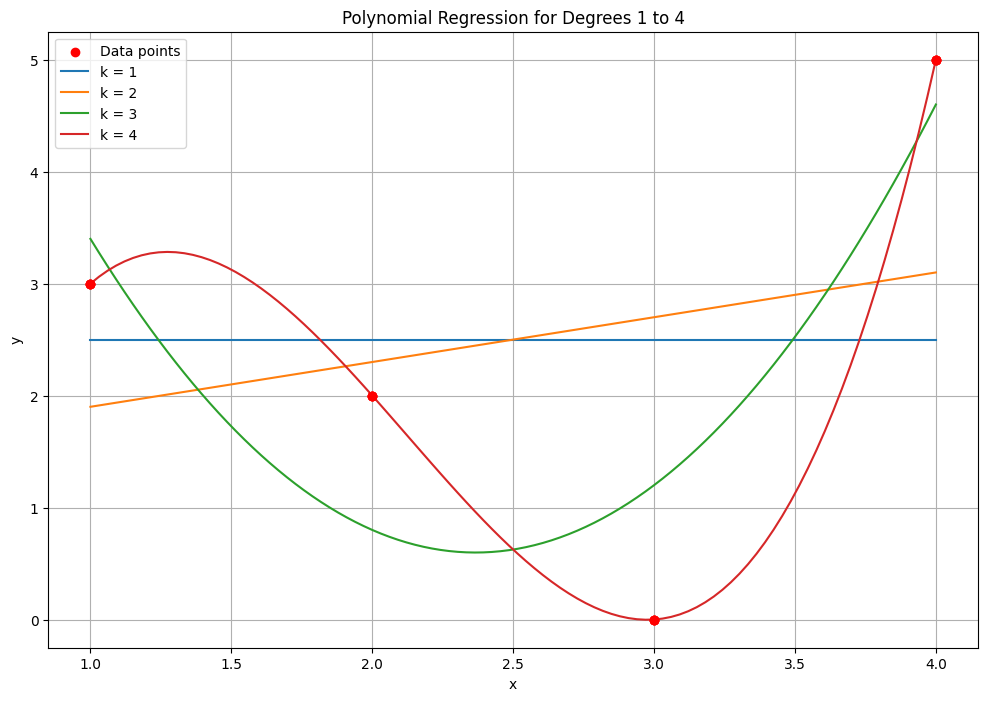

In [65]:
# initialize polynomial degrees and plot
degrees = [1, 2, 3, 4]
plt.figure(figsize=(12, 8))

# loop through degrees 
for degree in degrees:
    # estimate weights
    w = linear_regression(find_Phi(X, degree), y)  

    # plot the data points
    plt.scatter(X, y, color='red', label='Data points' if degree == 1 else "", zorder=5)
   
    # get 100 data points in range of x
    x_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)  
    # find corresponding polynomial features 
    Phi_range = find_Phi(x_range, degree)  
    # predict y for corresponding range
    y_pred_range = Phi_range @ w  
    # plot the fitted curve
    plt.plot(x_range, y_pred_range, label=f'k = {degree}')  

plt.title('Polynomial Regression for Degrees 1 to 4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


## (b) & (c)

In [66]:
# initialize results storage
weights = {}
mse = {}

# loop through degrees 1 to 4
for degree in degrees:
    # find polynomial features
    Phi = find_Phi(X, degree)
    # estimate weights
    w = linear_regression(Phi, y)  
    weights[degree] = w

    # predict values and calculate MSE
    y_pred = Phi @ w
    mse[degree] = np.mean((y - y_pred) ** 2)

    
    print(f"Coefficients for k = {degree} are {weights[degree]}")
    print(f"MSE for k = {degree} is {mse[degree]}")

Coefficients for k = 1 are [2.5]
MSE for k = 1 is 3.25
Coefficients for k = 2 are [1.5 0.4]
MSE for k = 2 is 3.05
Coefficients for k = 3 are [ 9.  -7.1  1.5]
MSE for k = 3 is 0.7999999999999999
Coefficients for k = 4 are [-5.         15.16666667 -8.5         1.33333333]
MSE for k = 4 is 9.572353768313846e-24


### Question 2

## (a)

In [67]:
# define the function g_sigma(x) 
def g_sigma(x, sigma=0.07):
    # noise is distributed normally with mean 0 and sigma σ
    noise = np.random.normal(0, sigma, size=x.shape)  
    return np.sin(2 * np.pi * x)**2 + noise

def generate_samples(num_samples=30, sigma=0.07):
    """
    Generate samples by uniformly sampling x from [0,1], and applying g_sigma to generate noisy output."""
    # sample “xi” uniformly at random from the interval [0,1] num_sample times
    x_random = np.random.uniform(0, 1, (num_samples, 1))
    
    # apply g0.07 to each x creating the data set
    s_random = g_sigma(x_random, sigma)
    
    return x_random, s_random


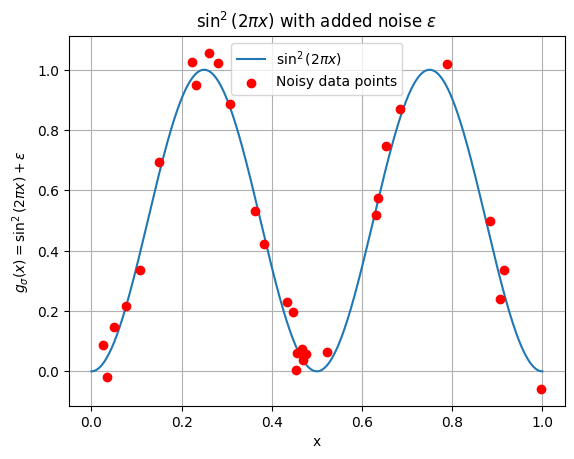

In [72]:
# generate x and y values for oisy data points
x_random, s_random = generate_samples()

# generate x and y values for plotting function g
x_values = np.linspace(0, 1, 1000)
s_values = np.sin(2 * np.pi * x_values)**2

# plot the function g
plt.plot(x_values, s_values, label=r'$\sin^2(2\pi x)$')

# scatter plot the noisy data points
plt.scatter(x_random, s_random, color='red', label=r'Noisy data points', zorder=5)

# Adding title and labels
plt.title(r'$\sin^2(2\pi x)$ with added noise $\epsilon$')
plt.xlabel('x')
plt.ylabel(r'$g_\sigma(x) = \sin^2(2\pi x) + \epsilon$')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

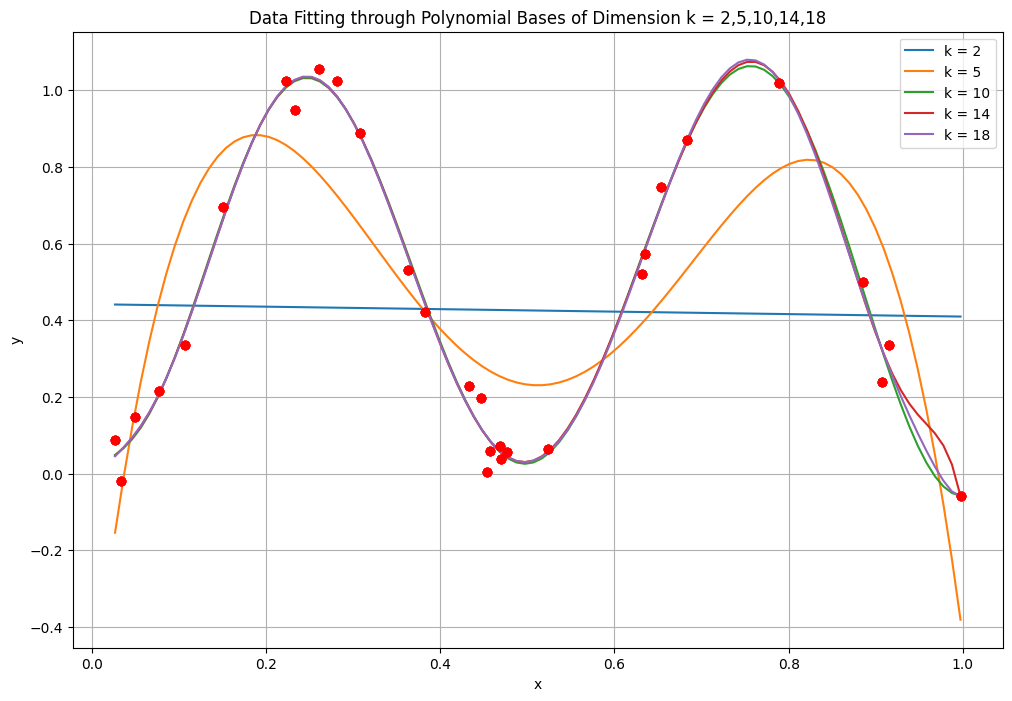

In [73]:
# initialize polynomial degrees and plot
degrees = [2,5,10,14,18]
plt.figure(figsize=(12, 8))

# loop through degrees 
for degree in degrees:
    # estimate weights
    w = linear_regression(find_Phi(x_random, degree), s_random)  

    # plot the data points
    plt.scatter(x_random, s_random, color='red', label='Data points' if degree == 1 else "", zorder=5)
   
    # get 100 data points in range of x
    x_range = np.linspace(min(x_random), max(x_random), 100).reshape(-1, 1)  
    # find corresponding polynomial features 
    Phi_range = find_Phi(x_range, degree)  
    # predict y for corresponding range
    y_pred_range = Phi_range @ w  
    # plot the fitted curve
    plt.plot(x_range, y_pred_range, label=f'k = {degree}')  

plt.title('Data Fitting through Polynomial Bases of Dimension k = 2,5,10,14,18')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## (b) & (c)

In [74]:
# generate a test set T: 1000 points 
x_test, s_test = generate_samples(num_samples=1000)

In [75]:
# compute MSE for fitting training set with a custom feature function
def compute_mse(x_data, y_data,  x_test_data, s_test_data, feature_func, degrees = np.arange(1, 19), plot = True, title=None, xlabel=None):

    """ Compute the MSE of the fitting of the data set with custom feature functions of dimension k """
    # # initialize results storage
    training_errors = {}
    test_errors = {}

    # loop through degrees 1 to 18
    for degree in degrees:
        # find features for the current degree using the custom feature function
        Phi_train = feature_func(x_data, degree)
        Phi_test = feature_func(x_test_data, degree)
        
        # estimate weights
        w = linear_regression(feature_func(x_data, degree), y_data)
      
        # predict y values and calculate MSE for training
        y_train_pred = Phi_train @ w
        training_errors[degree] = np.mean((y_data - y_train_pred) ** 2)
        
        # predict y values and calculating MSE for testing
        y_test_pred = Phi_test @ w
        test_errors[degree] = np.mean((s_test_data - y_test_pred) ** 2)
    
    # print("Training Errors (MSE) by Degree:")
    # for degree, error in training_errors.items():
    #     print(f"Degree {degree}: MSE = {error:.5f}")
    
    # print("Testing Errors (MSE) by Degree:")
    # for degree, error in training_errors.items():
    #     print(f"Degree {degree}: MSE = {error:.5f}")
    
    # Plot the natural log of the training and testing errors if plot=True
    if plot:
        plt.figure(figsize=(12, 8))
        
        # plot ln of the training errors
        plt.plot(degrees, np.log(list(training_errors.values())), marker='o', linestyle='-', color='b', label='ln (Training Error)')

        # plot ln of the test errors
        plt.plot(degrees, np.log(list(test_errors.values())), marker='o', linestyle='--', color='r', label='ln (Test Error)')
        
        # title and axis labels with customization
        plt.title(title if title else 'ln(Training and Test Error) vs Degree')
        plt.xlabel(xlabel if xlabel else 'Degree k')
        plt.ylabel('ln(MSE)')
        
        # set x-ticks to exactly match the polynomial degrees
        plt.xticks(degrees)

        # Show grid and plot
        plt.grid(True)
        plt.legend()
        plt.show()
    
    return training_errors, test_errors


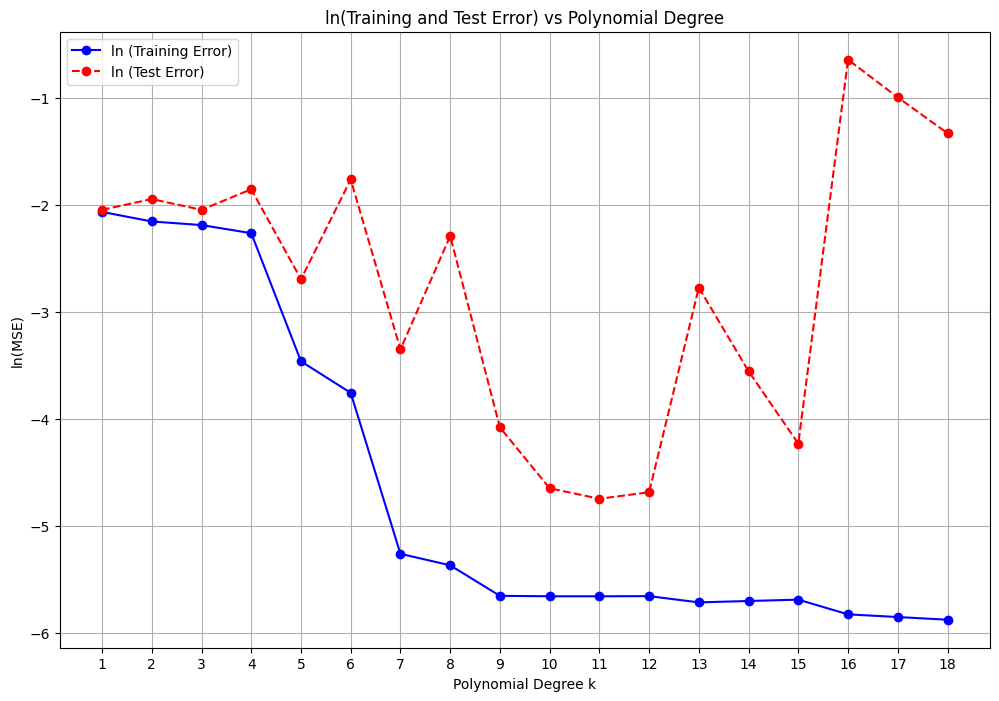

In [24]:
# compute MSE for the given degrees using polynomial basis 
training_errors_poly, testing_errors_poly = compute_mse(x_random, s_random, x_test, s_test, find_Phi, \
    title = 'ln(Training and Test Error) vs Polynomial Degree', xlabel= 'Polynomial Degree k')


## (d)

In [78]:
# run the experiment for multiple iterations
def run_experiment(feature_func, iterations=100, degrees=np.arange(1, 19), plot=True, title=None, xlabel=None):
    """
    Run the experiment for multiple iterations to compute average training and test errors for each degree.    
    """
    
    # MSE storgae for training and testing
    training_errors_avg = {degree: [] for degree in degrees}
    test_errors_avg = {degree: [] for degree in degrees}

    # loop through 100 runs
    for _ in range(iterations):
        # reseed for randomness in each iteration
        np.random.seed() 
        
        # generate a training set S: 30 points
        x_random, s_random = generate_samples()
        
        # generate a test set T: 1000 points
        x_test, s_test = generate_samples(num_samples=1000)
        
        # compute training and testing MSE for the current iteration
        training_errors, test_errors = compute_mse(x_random, s_random, x_test, s_test, feature_func, degrees, plot=False)
        
        # append the errors to the list
        for degree in degrees:
            training_errors_avg[degree].append(training_errors[degree])  
            test_errors_avg[degree].append(test_errors[degree])  

    # compute the average MSE for training and test errors
    avg_training_errors = {degree: np.mean(training_errors_avg[degree]) for degree in degrees}
    avg_test_errors = {degree: np.mean(test_errors_avg[degree]) for degree in degrees}

    if plot:
        # plot the natural log of the average errors
        plt.figure(figsize=(12, 8))
        plt.plot(degrees, np.log(list(avg_training_errors.values())), marker='o', linestyle='-', color='b', label='Training Error (ln)')
        plt.plot(degrees, np.log(list(avg_test_errors.values())), marker='o', linestyle='-', color='r', label='Test Error (ln)')   
         # title and axis labels with customization
        plt.title(title if title else 'ln(Average Training and Test Error) vs Degree')
        plt.xlabel(xlabel if xlabel else 'Degree k')
        plt.ylabel('ln(Average MSE)')
        plt.xticks(degrees)
        plt.grid(True)
        plt.legend()
        plt.show()

    return avg_training_errors, avg_test_errors

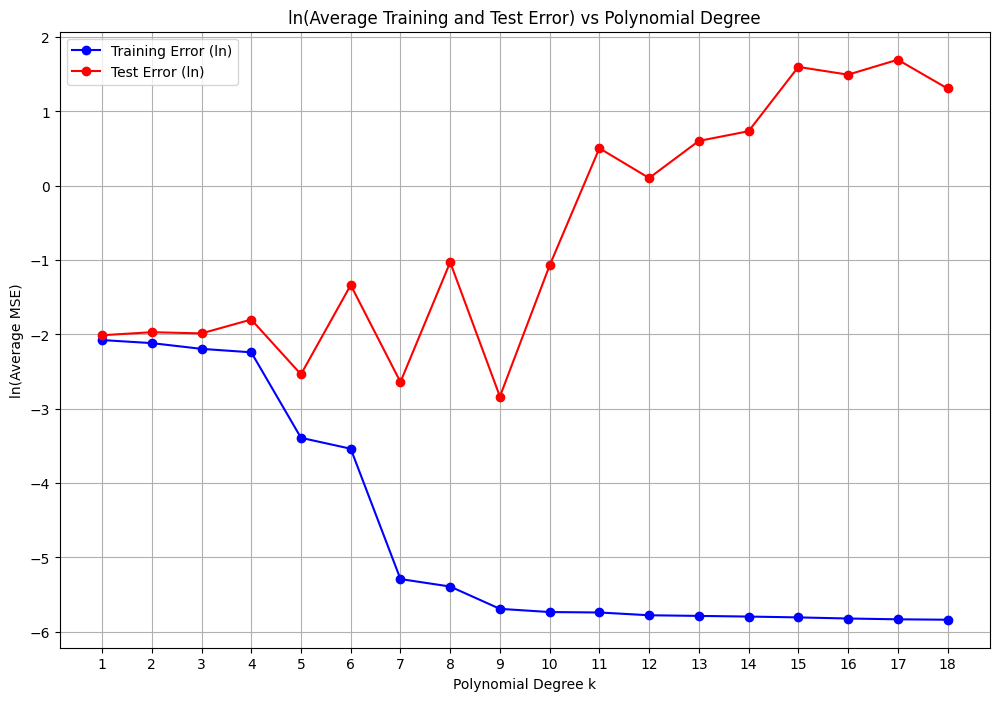

In [79]:
# run the experiment 100 times with the polynomial feature function 
avg_training_errors, avg_test_errors = run_experiment(find_Phi, title= 'ln(Average Training and Test Error) vs Polynomial Degree',\
    xlabel= 'Polynomial Degree k')

### Question 3

In [77]:
# construct new feature bases
def find_sin_Phi(X, degree):
    """Compute sine basis features up to given degree"""
    return np.hstack([np.sin(n * np.pi * X) for n in range(1, degree + 1)])

## (b) & (c)

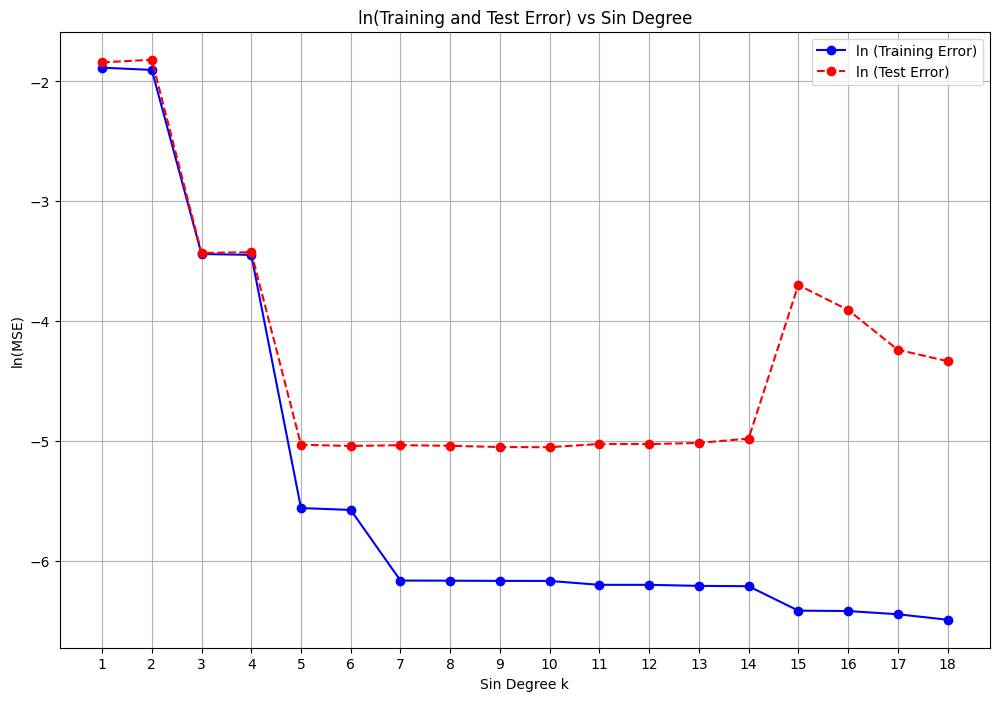

In [80]:
# compute MSE for the given degrees using sin basis 
training_errors_sin, testing_errors_sin = compute_mse(x_random, s_random, x_test, s_test, find_sin_Phi, \
    title = 'ln(Training and Test Error) vs Sin Degree', xlabel= 'Sin Degree k')

## (d)

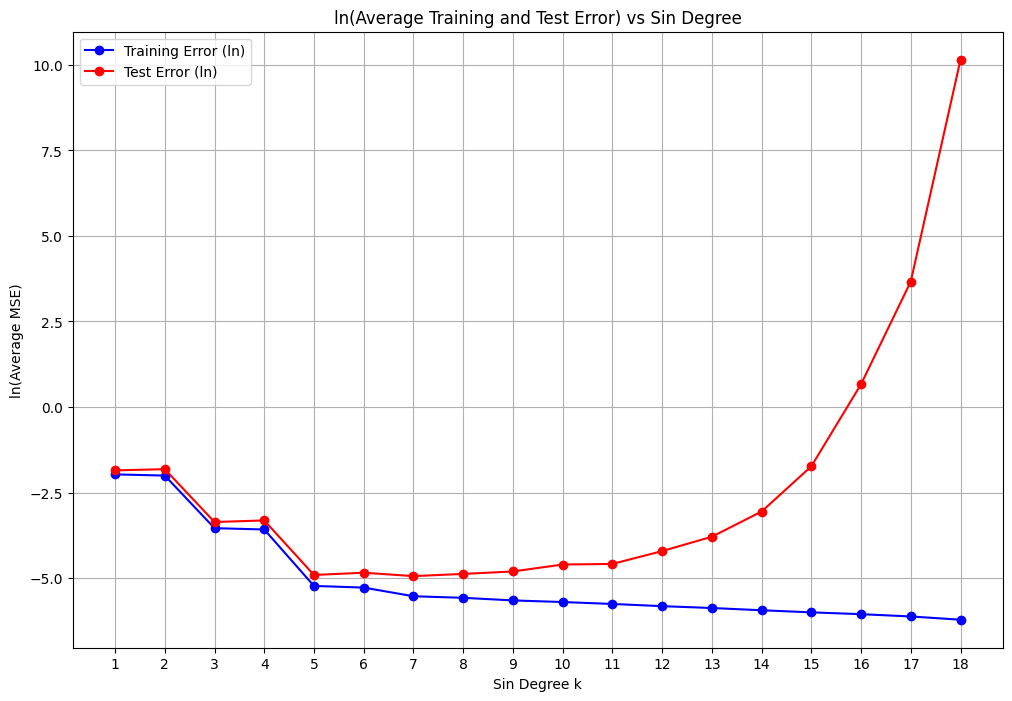

In [81]:
# run the experiment 100 times with the polynomial feature function 
avg_training_errors, avg_test_errors = run_experiment(find_sin_Phi, title= 'ln(Average Training and Test Error) vs Sin Degree',\
    xlabel= 'Sin Degree k')